# Homework 2 (100 Points)

The goal of this homework is to get more practice with pandas and get practice with clustering on various datasets.



## Exercise 1 - (50 points)

This exercise will be using the [Airbnb dataset](http://insideairbnb.com/get-the-data.html) for NYC called `listings.csv`. You can download it directly [here](http://data.insideairbnb.com/united-states/ny/new-york-city/2021-11-02/visualisations/listings.csv)

a) Produce a Heatmap using the Folium package (you can install it using pip) of the mean listing price per location (lattitude and longitude) over the NYC map. (5 points)

Hints:
1. generate a base map of NYC to plot over: default_location=[40.693943, -73.985880] 
2. generate an HTML file named `index.html` - open it in your browser and you'll see the heatmap 



In [279]:
# pip install folium
# Ryan Yordanoff
import pandas as pd
import folium
import folium.plugins

listings_data = pd.read_csv('listings.csv')

nyc_map = folium.Map(location=[40.693943, -73.985880])

#returns list of lists with lat,long,mean price weight
heatmap_data = listings_data.groupby(['latitude','longitude'])['price'].mean().reset_index().values.tolist() 


folium.plugins.HeatMap(heatmap_data).add_to(nyc_map)


nyc_map.save(outfile = "indexa.html")

# nyc_map

C:\Users\ryany\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


b) Normalize the price by subtracting the mean and dividing by the standard deviation. Then reproduce the heatmap from a). Comment on any differences you observe. - (5 points )



In [280]:
mean_price = listings_data['price'].mean()

stdev_price = listings_data['price'].std()

normalized_listings_data = listings_data.copy()

normalized_listings_data['price'] = (listings_data['price']-mean_price)/stdev_price

norm_nyc_map = folium.Map(location=[40.693943, -73.985880])

norm_heatmap_data = normalized_listings_data.groupby(['latitude','longitude'])['price'].mean().reset_index().values.tolist()

folium.plugins.HeatMap(norm_heatmap_data).add_to(norm_nyc_map)

norm_nyc_map.save(outfile = "indexb.html")

# norm_nyc_map

When comparing maps side by side, I notice subtle differences.  Some area have relatively higher weight intensities and some have relatively lower intensities, compared to non-normalized data.

c) Normalize the original price using sklearn's [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the interval [0,1]. Then reproduce the Heatmap from a). Comment on any differences you observe.  - (5 points)



In [281]:
from sklearn.preprocessing import MinMaxScaler

normalized2_listings_data = listings_data.copy()

scaler = MinMaxScaler()

normalized2_listings_data['price'] = scaler.fit_transform(listings_data[['price']])

norm2_nyc_map = folium.Map(location=[40.693943, -73.985880])

norm2_heatmap_data = normalized2_listings_data.groupby(['latitude','longitude'])['price'].mean().reset_index().values.tolist()

folium.plugins.HeatMap(norm2_heatmap_data).add_to(norm2_nyc_map)

norm2_nyc_map.save(outfile = "indexc.html")

# norm2_nyc_map

Again I am seeing slight differences similiar to my previous observations.  Comparing the 3 side by side, they all have subtle differences.

d) Plot a bar chart of the average price (un-normalized) per room type. Briefly comment on the relation between price and room type. - (2.5 points)


In [282]:
zz = listings_data.groupby(['room_type'])['price'].mean().reset_index().values.tolist()
my_zz = pd.DataFrame(zz)

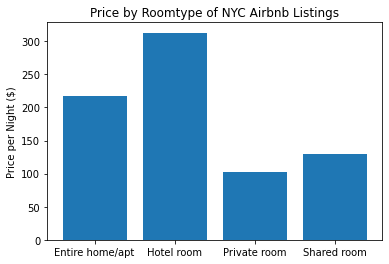

In [283]:
import matplotlib.pyplot as plt

avg_room_price = listings_data.groupby(['room_type'])['price'].mean().reset_index().values.tolist()
avg_room_price_df = pd.DataFrame(avg_room_price)

plt.bar(avg_room_price_df[0], avg_room_price_df[1])
plt.title("Price by Roomtype of NYC Airbnb Listings")
plt.ylabel("Price per Night ($)")
plt.show()

The graph speaks for itself;  Hotel Room is the most expensive by a large margin, entire place a bit lower, shared room and private room appear to be much lower relatively.

e) Plot on the NYC map the top 10 most expensive listings - (2.5 points)

In [284]:
ten_most_expensive = listings_data.sort_values('price',ascending=False).head(10)

nyc_map_e = folium.Map(location=[40.693943, -73.985880])

ten_most_expensive_l = ten_most_expensive[['latitude','longitude','name']].values.tolist()

for i in ten_most_expensive_l:
    folium.Marker(location = [i[0],i[1]], popup = i[2]).add_to(nyc_map_e)

nyc_map_e.save(outfile = "indexe.html")

# nyc_map_e

f) Plot on the NYC map the top 10 most reviewed listings - (2.5 points)


In [285]:
ten_most_reviewed = listings_data.sort_values('number_of_reviews_ltm',ascending=False).head(10)

ten_most_reviewed_l = ten_most_reviewed[['latitude','longitude','name']].values.tolist()

nyc_map_f = folium.Map(location=[40.693943, -73.985880])

for i in ten_most_reviewed_l:
    folium.Marker(location = [i[0],i[1]], popup = i[2]).add_to(nyc_map_f)

nyc_map_f.save(outfile = "indexf.html")

# nyc_map_f

g) Plot on the NYC map the top 10 most available listings - (2.5 points)

In [286]:
ten_most_available = listings_data.sort_values('availability_365',ascending=False).head(10)

ten_most_available_l = ten_most_available[['latitude','longitude','name']].values.tolist()

nyc_map_g = folium.Map(location=[40.693943, -73.985880])

for i in ten_most_available_l:
    folium.Marker(location = [i[0],i[1]], popup = i[2]).add_to(nyc_map_g)

nyc_map_g.save(outfile = "indexg.html")

# nyc_map_g

h) Using `longitude`, `latitude`, `price`, and `number_of_reviews`, use Kmeans to create 5 clusters. Plot the points on the NYC map in a color corresponding to their cluster. - (5 points)


In [287]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import branca.colormap as cm


kmeans_data = listings_data[['latitude', 'longitude', 'price', 'number_of_reviews']]

# standardize/scale
sc = StandardScaler()
kmeans_data_std = sc.fit_transform(kmeans_data.astype(float))

# perform kmeans
kmeans = KMeans(n_clusters=5).fit(kmeans_data_std)

# prepare map
nyc_map_h = folium.Map(location=[40.693943, -73.985880])

colormap = cm.LinearColormap(colors=['green', 'blue', 'orange','yellow','red'], index=[0,1,2,3,4])

kmeans_colors = kmeans.labels_

coords_l = listings_data[['latitude','longitude']].values.tolist()

# add cluster points to map
for i in range(len(coords_l)):
    folium.Circle(location=coords_l[i], radius=2, fill=True, color=colormap(kmeans_colors[i])).add_to(nyc_map_h)

nyc_map_h.save(outfile = "indexh.html")

# nyc_map_h

i) You should see points in the same cluster all over the map - briefly explain why that is. - (2.5 points)

This is because price and number of reviews is taken into account when clustering.  For instance one cluster in my plot appear to correspond with expensive listings.

j) How many clusters would you recommend using instead of 5? Display and interpret either the silhouette scores or the elbow method. - (5 points)

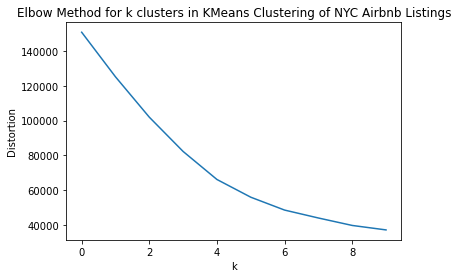

In [288]:
kmeans_data = listings_data[['latitude', 'longitude', 'price', 'number_of_reviews']]
kmeans_data_std = sc.fit_transform(kmeans_data.astype(float))

inertia_l = []

for i in range(10):    
    kmeans = KMeans(n_clusters=i+1)
    kmeans.fit(kmeans_data_std)
    inertia_l.append(kmeans.inertia_)

plt.plot(range(10), inertia_l)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method for k clusters in KMeans Clustering of NYC Airbnb Listings')
plt.show()

The plot shows a (slight) elbow at k=4 and k=6, so I would recommend using 6 clusters instead of 5, as diminishing returns appear after k = 6.

k) Would you recommend normalizing the price and number of reviews? Briefly explain why. - (2.5 points)

Yes I would recommend normalizing both.  Price is a much higher value (generally) than the number of reviews.  To compare these two features, we would need to normalize price/number of reviews.

l) For all listings of type `Shared room`, plot the dendrogram of the hierarchical clustering generated from `longitude`, `latitude`, and `price`. - (5 points)


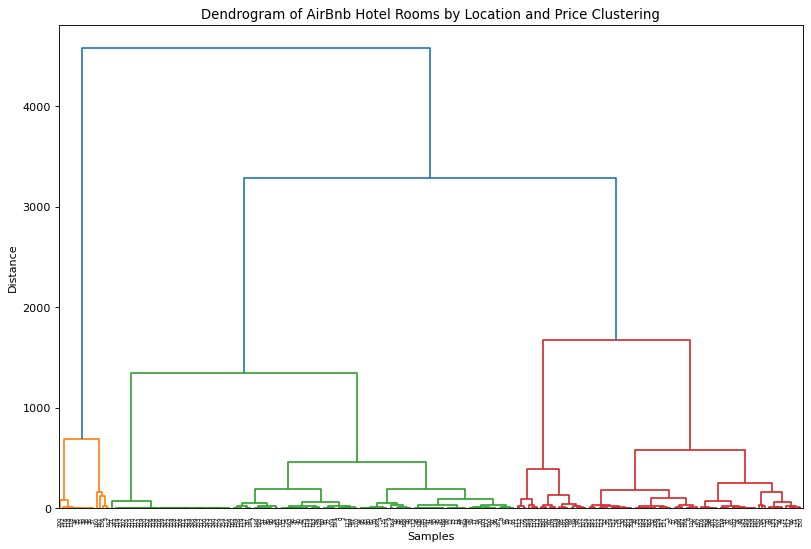

In [289]:
import scipy.cluster.hierarchy as shc

hotel_data = listings_data.loc[listings_data['room_type'] == 'Hotel room']

hierarchical_data = hotel_data[['latitude', 'longitude', 'price']]

plt.figure(figsize=(12, 8), dpi=80)
dendrogram = shc.dendrogram(shc.linkage(hierarchical_data, method='ward'))
plt.title("Dendrogram of AirBnb Hotel Rooms by Location and Price Clustering")  
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


m) briefly comment on what you observe from the structure of the dendrogram.  - (2.5 points)

Using the ward linkage method, it appears there a are 3 distinct clusters.  One minor cluster, shown in orange appears to be smaller and an outgroup.

n) Normalize the `price` as in b) and repeat l) - (2.5 points)

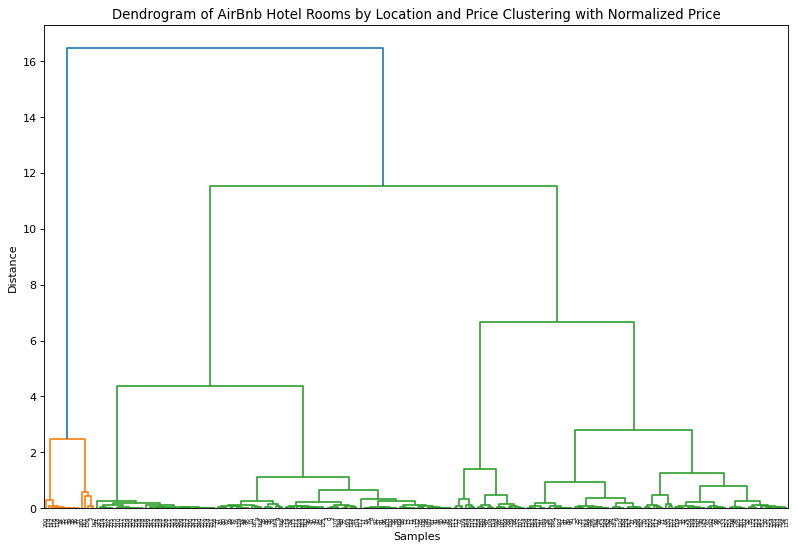

In [290]:
hotel_data_n = listings_data.loc[listings_data['room_type'] == 'Hotel room']

norm_hierarchical_data = hotel_data_n[['latitude', 'longitude', 'price']]

norm_hierarchical_data_copy = norm_hierarchical_data.copy()

mean_price_n = norm_hierarchical_data_copy['price'].mean()

stdev_price_n = norm_hierarchical_data_copy['price'].std()

norm_hierarchical_data_copy['price'] = (norm_hierarchical_data['price']-mean_price_n)/stdev_price_n

plt.figure(figsize=(12, 8), dpi=80)
dendrogram2 = shc.dendrogram(shc.linkage(norm_hierarchical_data_copy, method='ward'))
plt.title("Dendrogram of AirBnb Hotel Rooms by Location and Price Clustering with Normalized Price")  
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

## Exercise 2 (50 points)

This exercise will be using the [mnist dataset](http://yann.lecun.com/exdb/mnist/).

a) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster. - (10 points)

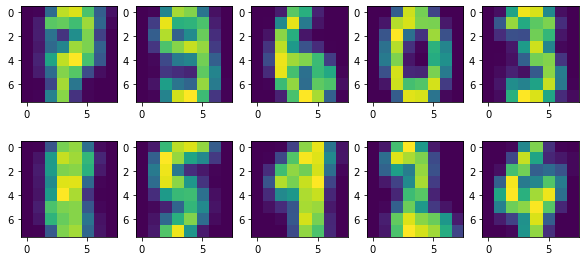

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

mnist = load_digits()

kmeans_a = KMeans(n_clusters=10)
kmeans_a.fit(mnist.data)

# convert 10,64 to 10,8,8 for plotting
centroids_8_8 = np.reshape(kmeans_a.cluster_centers_, [10,8,8])

# plot
plt.figure(figsize = (10,9))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(bottom=.5)
    plt.imshow(centroids_8_8[i])


b) what is the disagreement distance between the clustering you created above and the clustering created by the labels attached to each image? Briefly explain what this number means in this context. - (10 points)

In [292]:
from itertools import combinations

p_c = np.vstack([mnist.target, kmeans_a.labels_],).transpose()

# for i in combinations(zz_ten, 2):   #use to view combinations that match as sanity check
#     if (i[0][0] == i[1][0]) or (i[0][1] == i[1][1]):
#         print(i)

disagreement_d = 0

for i in combinations(p_c, 2):
    if (i[0][0] == i[1][0]) or (i[0][1] == i[1][1]):
        disagreement_d += 1 

print(f'The disagreement distance is equal to: {disagreement_d}.')

The disagreement distance is equal to: 213024.


The disagreement distance is equal to: 213234. In this context the disagreement distance indicates the level of disagreement our kmeans clustering had, compared to the actual cluster label.  So in this context the disagreement is analogous to the level of error with kmeans clustering.

c) Download the CIFAR-10 dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html). Open `batch_1` by following the documentation on the web page. Plot a random image from the dataset. - (10 points)

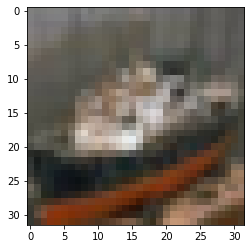

In [293]:
# load batch_1
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

db_1 = unpickle('data_batch_1')


db_1_data = db_1[b'data'] # .shape = (10000, 3072)
db_1_data = db_1_data.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")


#plot
rand = np.random.choice(range(len(db_1_data)))
plt.imshow(db_1_data[rand])

d) This image is 32 x 32 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. Using the same image as in c), produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans). - (10 points)

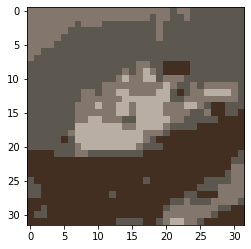

In [294]:
flat = db_1_data[rand].reshape(1024,3)

kmeans_d = KMeans(n_clusters=4)

kmeans_d.fit(flat)

centers = np.uint8(kmeans_d.cluster_centers_)

labels = kmeans_d.labels_.flatten()

# pixel color change to centroid
image = centers[labels.flatten()]

image = image.reshape(32, 32, 3)

# show the image
plt.imshow(image)
plt.show()

e) Write a function that applies this transformation to the entire dataset for any number K of colors. - (10 points)

In [295]:
def kmeans_dataset(data, k):
    data = data.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

    for i in range(len(data)):
        flat_data = data[i].reshape(1024,3)

        kmeans = KMeans(n_clusters=k)

        kmeans.fit(flat_data)

        centers = np.uint8(kmeans.cluster_centers_)

        labels = kmeans.labels_.flatten()

        image = centers[labels.flatten()]

        data[i] = image.reshape(32, 32, 3)

    return data



Example of kmeans_dataset():

In [296]:
k_5_dataset = kmeans_dataset(db_1[b'data'], 5)

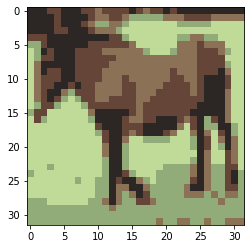

In [297]:
plt.imshow(k_5_dataset[7])
plt.show()

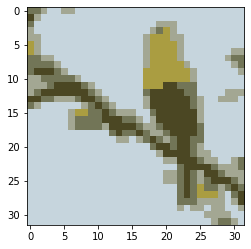

In [298]:
plt.imshow(k_5_dataset[8010])
plt.show()